# **Google Stock analysis based on Simple Moving Average Crossover Strategy**


## **Project Statement:**
### Mark the Long and Short position for the Google Stock based on historical data of the stock of the past 3 years from yahoo finance using simple moving average crossover strategy for the positions.

### **Set up enviornment**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from pandas_datareader import data
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### **Import the data from the Yahoo Finance site**

> ### We have taken last three financial years of data of Google stocks for analysis.

In [0]:
google = data.DataReader('GOGL', 'yahoo',start='03/31/2016', end='03/31/2019')

### **Galance at the Data**

In [205]:
google.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-03-31,3.55,3.40,3.40,3.50,142200.0,3.143723
2016-04-01,3.55,3.45,3.45,3.45,58900.0,3.098813
2016-04-04,3.60,3.30,3.50,3.30,50200.0,2.964082
2016-04-05,3.40,3.30,3.35,3.30,35300.0,2.964082
2016-04-06,3.40,3.25,3.35,3.35,83200.0,3.008992


In [206]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2016-03-31 to 2019-03-29
Data columns (total 6 columns):
High         755 non-null float64
Low          755 non-null float64
Open         755 non-null float64
Close        755 non-null float64
Volume       755 non-null float64
Adj Close    755 non-null float64
dtypes: float64(6)
memory usage: 41.3 KB


In [207]:
google.describe()

,High,Low,Open,Close,Volume,Adj Close
count,755.000000,755.000000,755.000000,755.000000,7.550000e+02,755.000000
mean,6.766146,6.557325,6.659298,6.657232,2.169494e+05,6.065725
std,2.019557,2.013667,2.023250,2.018413,2.107422e+05,1.840735
min,3.350000,3.100000,3.220000,3.100000,8.900000e+03,2.784441
25%,4.755000,4.590000,4.670000,4.640000,9.305000e+04,4.181152
50%,7.100000,6.870000,7.000000,7.000000,1.613000e+05,6.485052
75%,8.565000,8.350000,8.450000,8.435000,2.759500e+05,7.627362
max,10.050000,9.870000,9.880000,9.950000,2.127300e+06,9.242495


### **Visualization of opening and closing of stock price.**

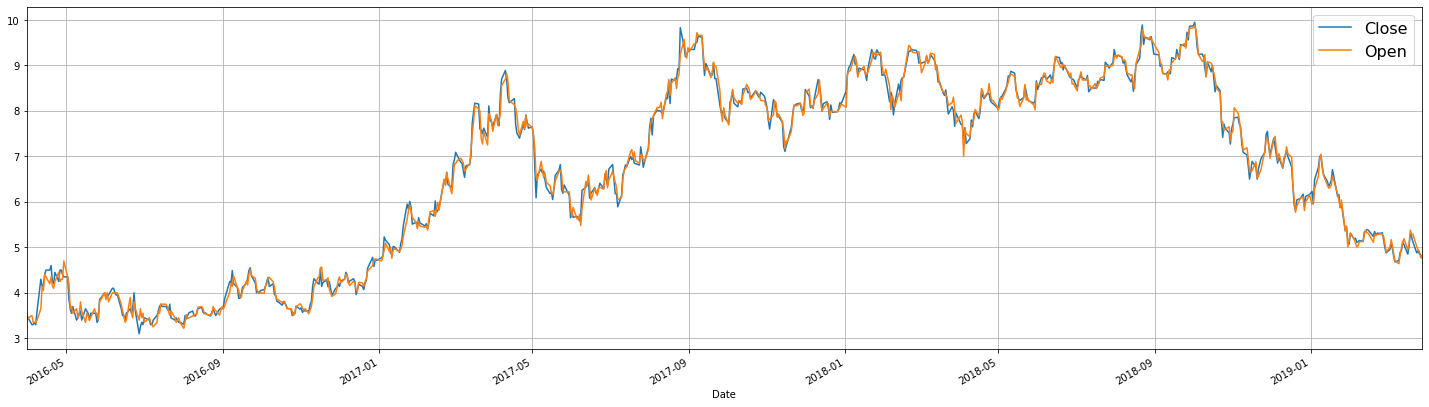

In [208]:
google[['Close','Open']].plot(grid=True,figsize=(25,7))
plt.legend(prop={'size':16})

### **Taking the rolling means with 5 days and 30 days means.**

In [0]:
google['5days'] = np.round(google['Close'].rolling(window=5).mean(),2)
google['30days'] = np.round(google['Close'].rolling(window=30).mean(),2)

### **Ploting the moving average**

Text(0, 0.5, 'Stock Price')

Text(0.5, 0, 'Date')

Text(0.5, 0.98, 'Moving Averages and Closing values')

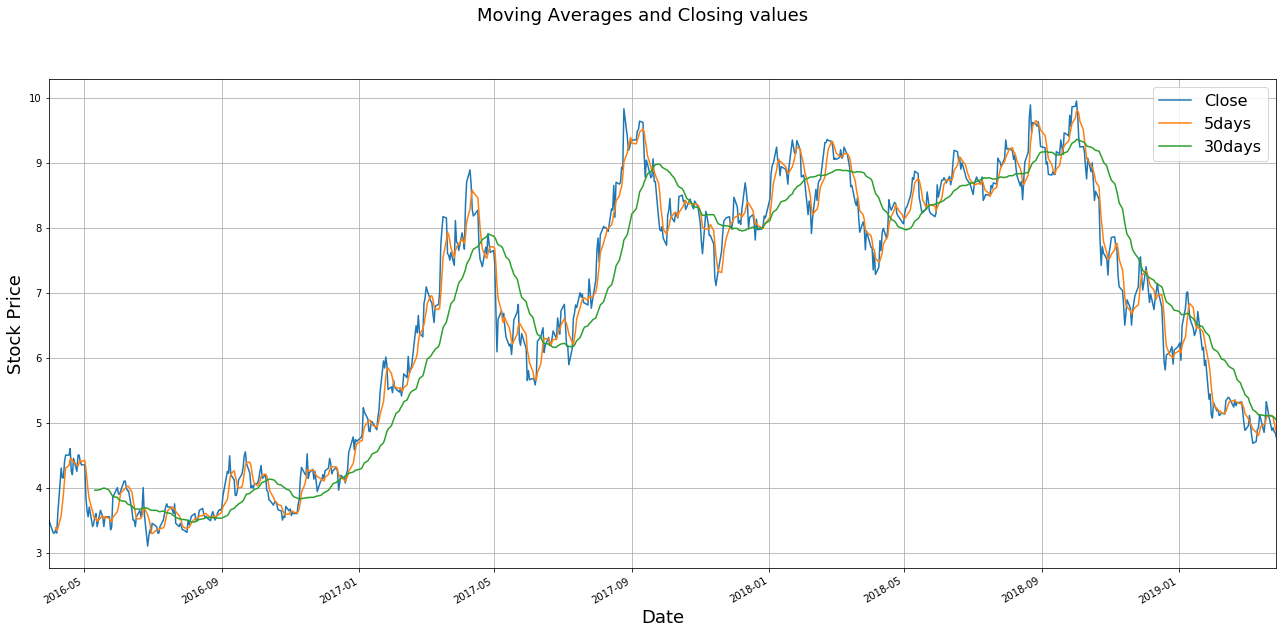

In [210]:
google[['Close','5days','30days']].plot(grid=True,figsize=(22,10))
plt.legend(prop={'size':16})
plt.ylabel('Stock Price',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.suptitle('Moving Averages and Closing values',fontsize=18)

In [211]:
google['5days'].head()

Date
2016-03-31     NaN
2016-04-01     NaN
2016-04-04     NaN
2016-04-05     NaN
2016-04-06    3.38
Name: 5days, dtype: float64

In [212]:
google['30days'].head()

Date
2016-03-31   NaN
2016-04-01   NaN
2016-04-04   NaN
2016-04-05   NaN
2016-04-06   NaN
Name: 30days, dtype: float64

In [213]:
google.head()

,High,Low,Open,Close,Volume,Adj Close,5days,30days
Date,,,,,,,,
2016-03-31,3.55,3.40,3.40,3.50,142200.0,3.143723,NaN,NaN
2016-04-01,3.55,3.45,3.45,3.45,58900.0,3.098813,NaN,NaN
2016-04-04,3.60,3.30,3.50,3.30,50200.0,2.964082,NaN,NaN
2016-04-05,3.40,3.30,3.35,3.30,35300.0,2.964082,NaN,NaN
2016-04-06,3.40,3.25,3.35,3.35,83200.0,3.008992,3.38,NaN


In [214]:
google['5days'].shape

(755,)

In [215]:
google['5days'].value_counts().sum()

751

In [216]:
google['30days'].value_counts().sum()


726

### **Criteria for a long and short position.**

*   Take the Long position when the 5 days moving average is more than 30 days 
moving average with certain points.
*   Take the Short position when the 5 days moving average is less than 30 days 
moving average with certain points.

### **Assumption of value**

*   I have selected the number of points(X) as 0.5 for taking a short or long position, where the X is the difference between simple moving average of 5 days and 30 days.
*   I have seen that from the data taking the mean of highs and lows into consideration whenever there is a rise of 0.5 points there is a good probability for taking position.



 






In [0]:
google['5-30_days'] = google['5days'] - google['30days']

### **Position are represented by numbers as:**


*   Short Position is represented by '-1'.
*   Long  Position is represented by '1'.



In [218]:
X = 0.5
google['Stance'] = np.where(google['5-30_days'] > X, 1, 0)
google['Stance'] = np.where(google['5-30_days'] < -X, -1, google['Stance'])
google['Stance'].value_counts()

 0    554
-1    104
 1     97
Name: Stance, dtype: int64

### **Vizualization of Position**

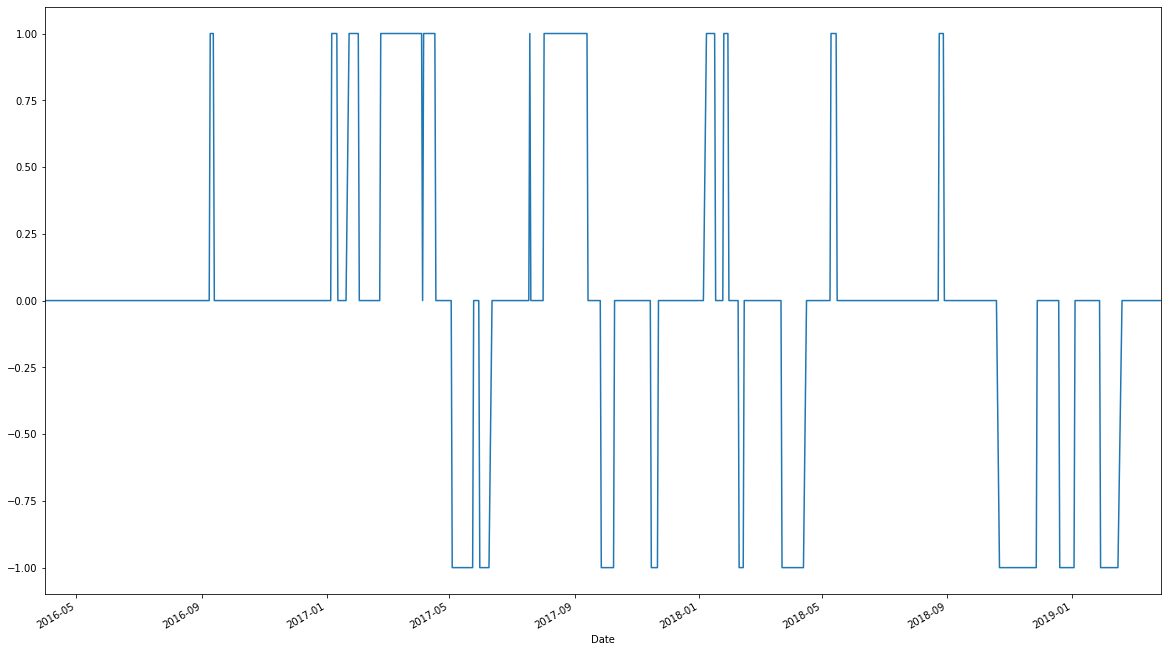

In [219]:
google['Stance'].plot(lw=1.5,ylim=[-1.1,1.1], figsize = (20,12))

### **Number of Positions**

*   For Short - 97
*   For Long - 104



In [220]:
google['Position'] = np.where(google['Stance'] == 1, 'LONG',0) 
google['Position'] = np.where(google['Stance'] == -1,'SHORT',google['Position'])
google['Position'] = np.where(google['Stance'] == 0, 'NO Position',google['Position'])
google['Position'].value_counts()

NO Position    554
SHORT          104
LONG            97
Name: Position, dtype: int64

In [221]:
google.tail()

,High,Low,Open,Close,Volume,Adj Close,5days,30days,5-30_days,Stance,Position
Date,,,,,,,,,,,
2019-03-25,5.06,4.88,5.02,4.88,356500.0,4.774105,5.11,5.10,0.01,0,NO Position
2019-03-26,5.00,4.90,4.95,4.92,208000.0,4.813237,5.09,5.09,0.00,0,NO Position
2019-03-27,4.92,4.81,4.91,4.86,109600.0,4.754539,5.00,5.08,-0.08,0,NO Position
2019-03-28,4.91,4.77,4.78,4.84,103000.0,4.734973,4.92,5.06,-0.14,0,NO Position
2019-03-29,4.80,4.75,4.79,4.77,110500.0,4.666492,4.85,5.04,-0.19,0,NO Position


In [0]:
google_map = google[google.Stance != 0]
google_map = google_map[['High','Low','Open','Close','Volume','Position']]

Text(0, 0.5, 'Stock Price')

Text(0.5, 0, 'Date')

Text(0.5, 0.98, 'Moving Averages and Close values of Google')

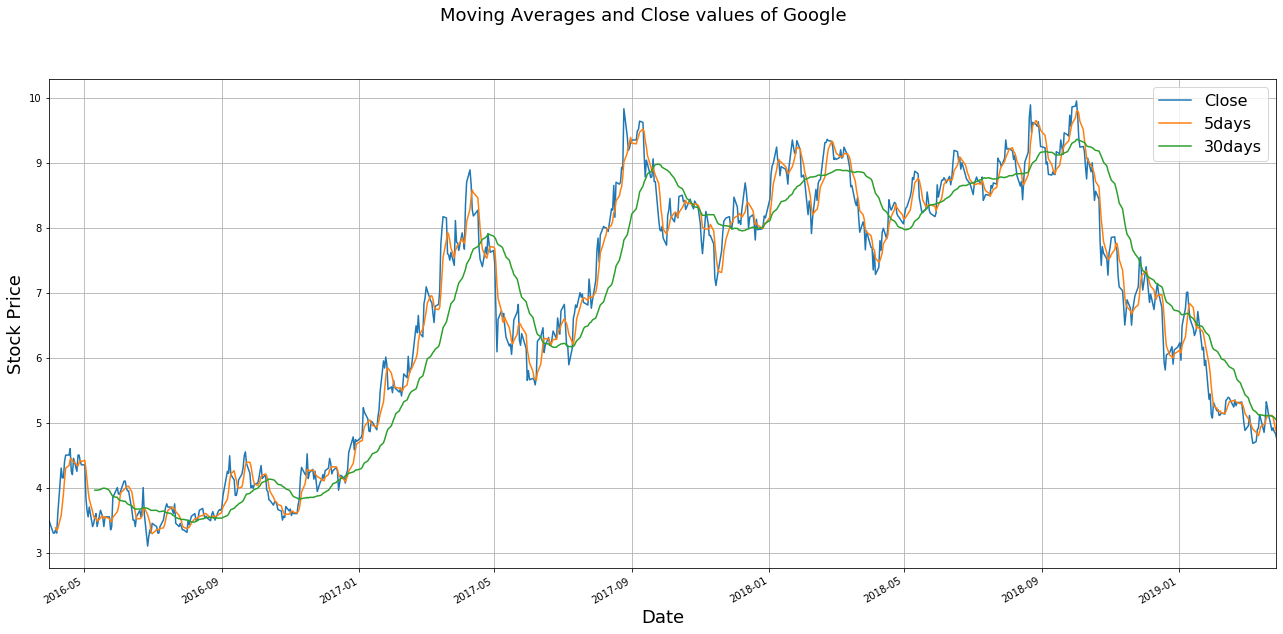

In [223]:
google[['Close','5days','30days']].plot(grid=True,figsize=(22,10))
plt.legend(prop={'size':16})
plt.ylabel('Stock Price',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.suptitle('Moving Averages and Close values of Google',fontsize=18)

## **Final Position Table** 

In [224]:
google_map.tail()

,High,Low,Open,Close,Volume,Position
Date,,,,,,
2019-02-11,5.15,5.07,5.13,5.13,120500.0,SHORT
2019-02-12,5.38,5.27,5.29,5.34,118100.0,SHORT
2019-02-13,5.40,5.32,5.37,5.36,118200.0,SHORT
2019-02-14,5.41,5.30,5.32,5.39,104300.0,SHORT
2019-02-15,5.41,5.30,5.31,5.38,214200.0,SHORT


### **Plotting the Short and Long Postion with moving average.**

Text(0, 0.5, 'Stock Price')

Text(0.5, 0, 'Date')

Text(0.5, 0.98, 'Position Plot with Moving Average of Google')

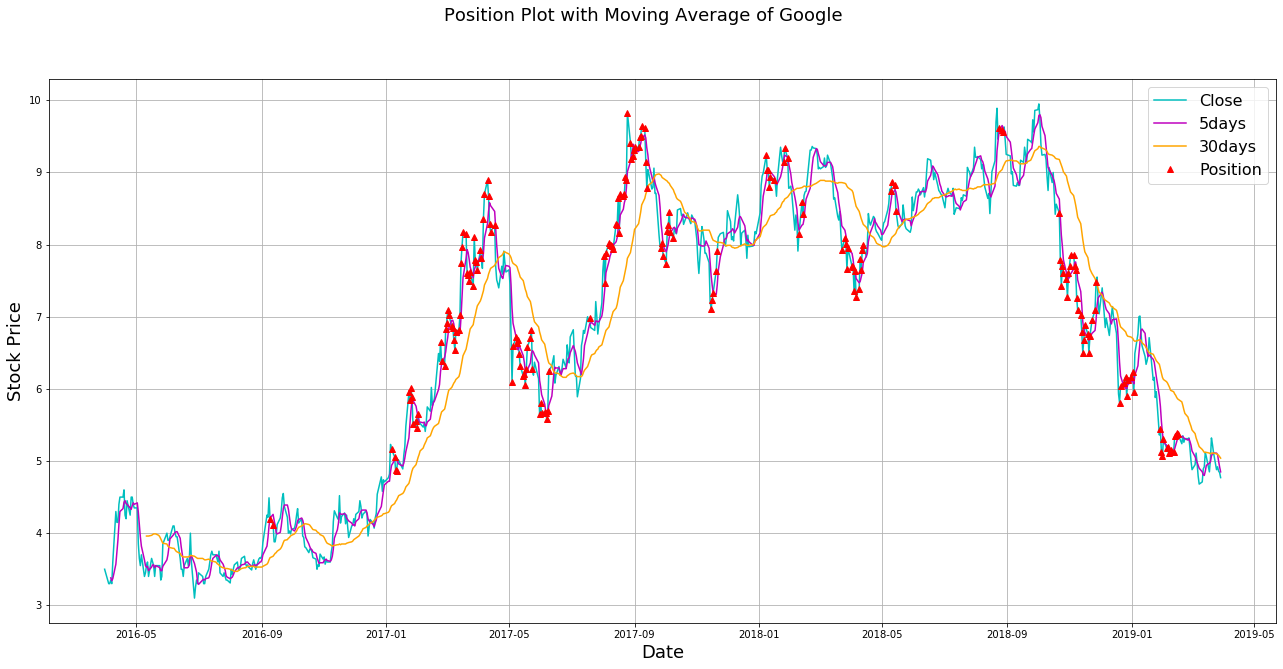

In [225]:
fig, ax = plt.subplots(figsize=(22, 10))
ax.plot(google['Close'], '-',color='c',label='Close')
ax.plot(google['5days'], '-',color='m',label='5days')
ax.plot(google['30days'], '-',color='orange',label='30days')
ax.plot(google_map['Close'],'^', color = 'r',label='Position')
plt.ylabel('Stock Price',fontsize=18)
plt.xlabel('Date',fontsize=18)
plt.suptitle('Position Plot with Moving Average of Google',fontsize=18)
ax.grid()
ax.legend(loc="upper right")
plt.legend(prop={'size':16})